<font size="3">KINGDOM OF SAUDI ARABIA<br>
Ministry of Higher Education<br>                                  
Al-Imam Mohammad University<br>
College of Computer & Information Sciences<br><br>
    
 
**Digital Image Processing (CS456), Spring 2023**
<br>**Instructor:
Dr. Fahman Saeed**
<br><br>
**Prepared by:**<br>
- Khloud Alnufaie (440020617)<br>
- Raghad Albosais (440020209)<br>
- Weaam Alghaith (440023306)<br>


**Section: 371**

# Fingerprit Classification


## 1. Introduction
Fingerprints identification and verification systems have been used widely in most important applications in order to ensure public security. Fingerprints are unique and are the most reliable human feature which can be utilized for personal identification. In this project, we aim to build a Machine Learning model to classify fingerprint images into four types: arch, right loop, left loop and whorl. The table below describe the main point of this project:


|Input|Image|
|:----|:----|
|Output|Class (1: 'arch', 2: 'right', 3: 'left', 4: 'whorl')|
|Task|Multi-class classification|
|Field|AI-Computer Vision|
|App|AI in Cybersecurity|
|Evaluation metric|Accuracy, Precision, F1-score.|
|Learning method|Machine Learning|
|Learning type|Supervised Learning.|


 
## 2. Dataset

We use the Fingerprint Verification Competition (FVC) 2004 dataset. It consists of fingerprint images of four different types of fingerprints. The dataset has been collected with different types of sensors. You can download the dataset and see more detailed information in this link http://bias.csr.unibo.it/fvc2004/databases.asp.

## 3. Model Pipline
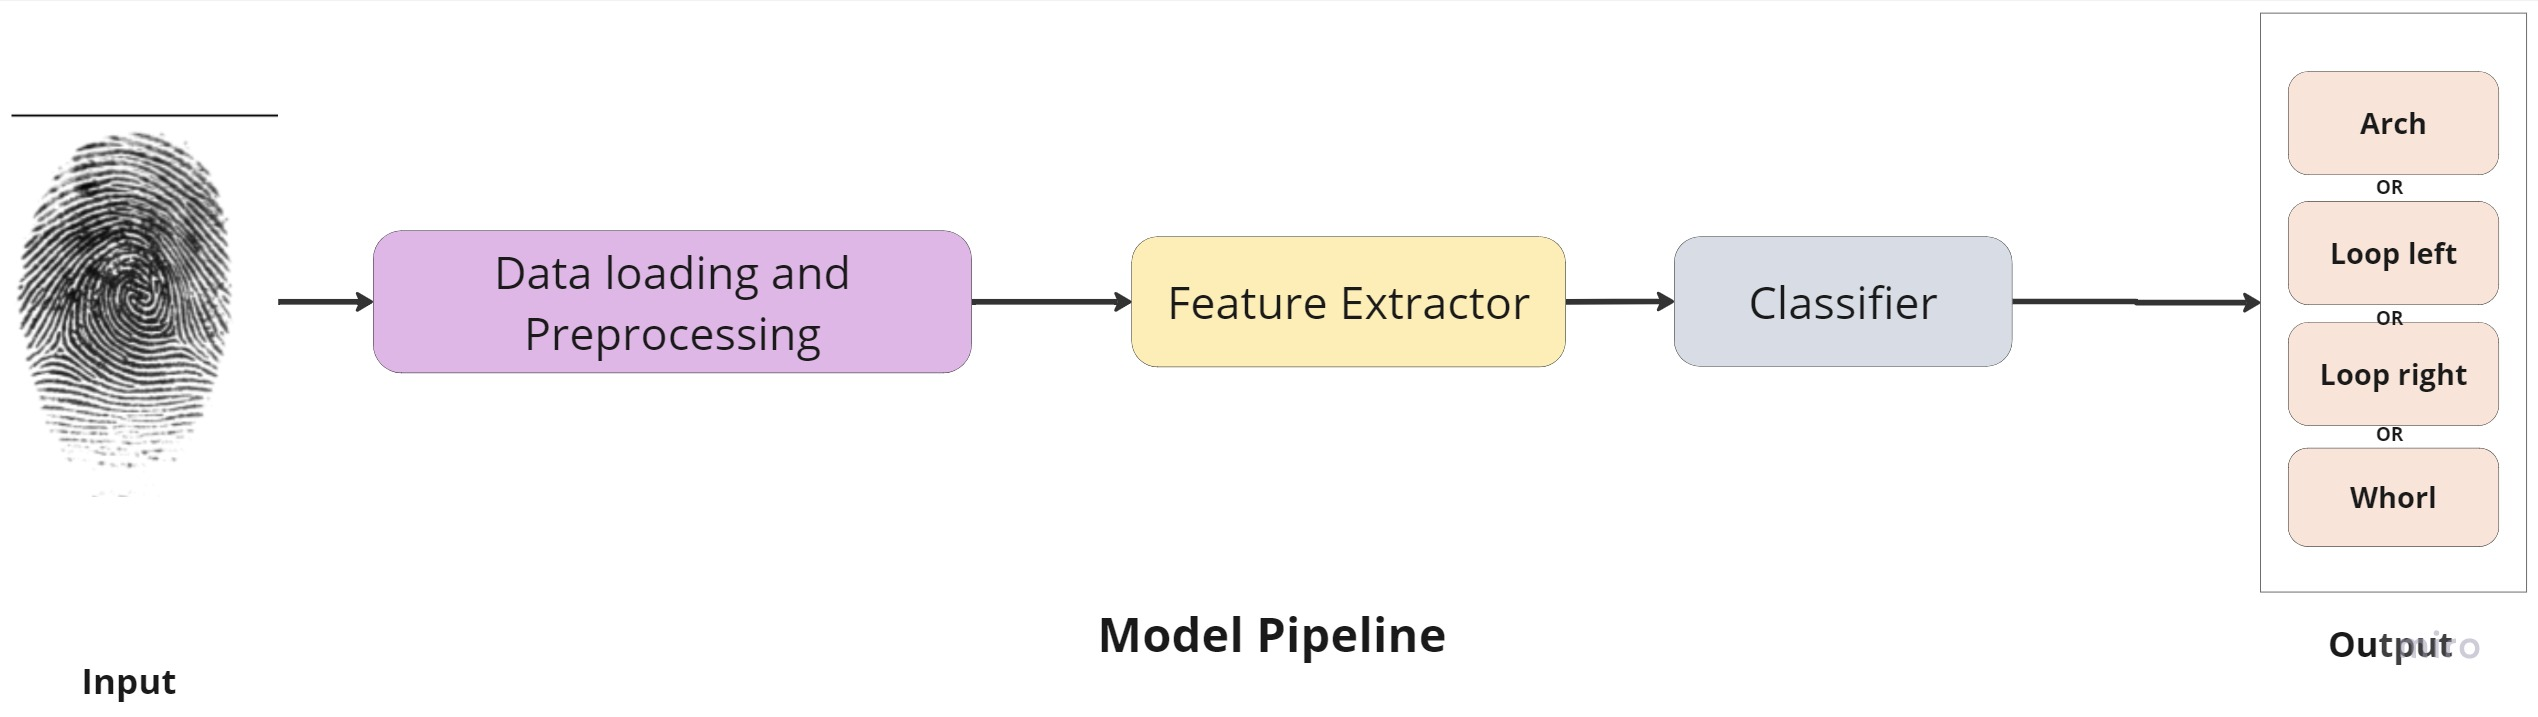

## 4. Import Resources

In [ ]:
# to get the current files
import os
#pd :package used for data analysis and manipulation tool
import pandas as pd
#module :to import name for opencv-python  library to solve computer vision problems
import cv2
#train_test_split : splitting dataset into two subsets: for training data and for testing data.
from sklearn.model_selection import train_test_split
#NumPy :is a Python library used for convert list to arrays
import numpy as np
#sns :library for data visualization
import seaborn as sns
#plt :module to import name for opencv-python  library to solve computer vision problems.
import matplotlib.pyplot as plt 
#warnings :module was introduced in PEP 230 as a way to warn programmers 
import warnings
warnings.filterwarnings('ignore')

# evaluation metrics
from sklearn.metrics import accuracy_score, precision_score,f1_score, confusion_matrix,classification_report, ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# set of ML models
from sklearn.svm import LinearSVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

## 5. Loading the data

In [ ]:
# download the images as filenames with their labels
# list of class names
data_dir = 'data_fingerprint'
labels_number = ['1', '2', '3', '4']
labels_name = ['arch', 'right', 'left', 'whorl']
def get_data(data_dir):
    data = [] 
    for label in labels_number: 
        path = os.path.join(data_dir, label)
        class_num = int(label)
        for img in os.listdir(path):
          data.append((os.path.join(path, img), class_num))

    return data
    
full_data = get_data(data_dir)
df = pd.DataFrame(full_data, columns=['image', 'label'])

## 6. Exploring the data

In [ ]:
# show the first five entry
df.head()

,image,label
0,data_fingerprint\1\100_1.tif,1
1,data_fingerprint\1\100_2.tif,1
2,data_fingerprint\1\100_3.tif,1
3,data_fingerprint\1\100_4.tif,1
4,data_fingerprint\1\100_5.tif,1


In [ ]:
df.tail()

,image,label
3459,data_fingerprint\4\98_4.tif,4
3460,data_fingerprint\4\98_5.tif,4
3461,data_fingerprint\4\98_6.tif,4
3462,data_fingerprint\4\98_7.tif,4
3463,data_fingerprint\4\98_8.tif,4


In [ ]:
# shuffle the DataFrame rows
df = df.sample(frac = 1)

In [ ]:
df.head()

,image,label
1490,data_fingerprint\3\18_1.tif,3
2083,data_fingerprint\3\69_4.tif,3
2938,data_fingerprint\4\52_3.tif,4
592,data_fingerprint\2\25_3.tif,2
1934,data_fingerprint\3\51_7.tif,3


In [ ]:
df.tail()

,image,label
2314,data_fingerprint\3\92_3.tif,3
2313,data_fingerprint\3\92_2.tif,3
1878,data_fingerprint\3\45_8 (2).tif,3
1456,data_fingerprint\3\14_4.tif,3
3454,data_fingerprint\4\97_8 (2).tif,4


In [ ]:
# print some statistics
print('Total Number of Samples in Dataset: ', len(df))
print('Number of Samples for class Arch: ', len(df.loc[df['label'] == 1]))
print('Number of Samples for class Right Loop: ', len(df.loc[df['label'] == 2]))
print('Number of Samples for class Left Loop: ', len(df.loc[df['label'] == 3]))
print('Number of Samples for class Whorl: ', len(df.loc[df['label'] == 4]))

Total Number of Samples in Dataset:  3464
Number of Samples for class Arch:  312
Number of Samples for class Right Loop:  1001
Number of Samples for class Left Loop:  1087
Number of Samples for class Whorl:  1064


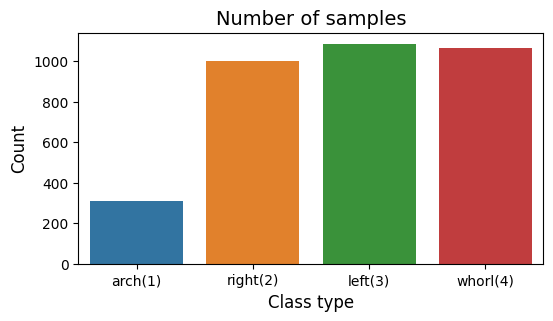

In [ ]:
# print out the number of samples in each class
# to check for imbalance problem

count_0 = len([ x for x in full_data if x[1] == 1 ])
count_1 = len([ x for x in full_data if x[1] == 2 ])
count_2 = len([ x for x in full_data if x[1] == 3 ])
count_3 = len([ x for x in full_data if x[1] == 4 ])


plt.figure(figsize=(6,3))
sns.barplot(x=labels_number, y= [count_0, count_1, count_2, count_3])
plt.title('Number of samples', fontsize=14)
plt.xlabel('Class type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(labels_number)), ['arch(1)', 'right(2)', 'left(3)', 'whorl(4)'])
plt.show()


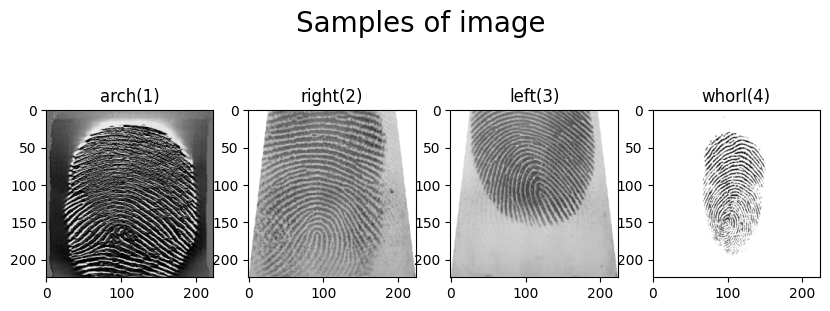

In [ ]:
# visulaize some samples
img_size = 224
def read_image(class_num):
  img_arr = cv2.imread((df.loc[df['label'] == class_num][0:1]['image']).values[0]) 
  resized_arr = cv2.resize(img_arr, (img_size, img_size))
  return resized_arr

fig = plt.figure(figsize=(10, 10))
for i in range(4):
    img = read_image(int(labels_number[i]))
    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(labels_name[i]+'('+ labels_number[i] +')')
    #the title of display 
    plt.suptitle(("Samples of image"), fontsize=20)

## Spliting the dataset

In [ ]:
# split the dataset into train set and test set
x_train, x_test, y_train, y_test = train_test_split(
    df['image'], df['label'], train_size=0.80, random_state=420)

In [ ]:
# put them into dataframe
df_train =pd.concat([x_train,y_train],axis=1, names=['image', 'label'])
df_test =pd.concat([x_test,y_test],axis=1, names=['image', 'label'])

In [ ]:
df_train.head()

,image,label
2712,data_fingerprint\4\28_5 (2).tif,4
2985,data_fingerprint\4\56_1.tif,4
3452,data_fingerprint\4\97_7 (2).tif,4
1726,data_fingerprint\3\37_8 (2).tif,3
1316,data_fingerprint\3\102_2.tif,3


In [ ]:
df_test.head()

,image,label
2426,data_fingerprint\4\101_7 (4).tif,4
1560,data_fingerprint\3\23_8.tif,3
2908,data_fingerprint\4\49_5.tif,4
2969,data_fingerprint\4\55_1.tif,4
213,data_fingerprint\1\67_5 (3).tif,1


In [ ]:
# print their shapes
print('Number of samples in training set : ', len(df_train['image']))
print('Number of samples in testing set : ', len(df_test['image']))

Number of samples in training set :  2771
Number of samples in testing set :  693


## 7. Feature Extraction

### 7.1 Cann edge

Canny edge detector is the most widely known edge detector in computer vision, it consist of basic steps involved in this algorithm are [2]:

-	Noise reduction using Gaussian filter 

-	Gradient calculation along the horizontal and vertical axis 

-	Non-Maximum suppression of false edges 

-	Double thresholding for segregating strong and weak edges 

-	Edge tracking by hysteresis


In [ ]:
# the size of image
img_size = 160
# the channel of image
channel = cv2.IMREAD_GRAYSCALE # cv2.IMREAD_COLOR # cv2.IMREAD_UNCHANGED or cv2.IMREAD_GRAYSCALE

def Canny_Edge(data_frame):
  x = []
  y = []

  for index, row in data_frame.iterrows():
    img_path= row[0]
    img_label = row[1]

    # Step1: read image
    img_arr = cv2.imread(img_path) 

    # Step2: resize image
    resized_arr = cv2.resize(img_arr, (img_size, img_size))


    # Step3: Canny method (We used the common values for each hyperparameters)

    # Setting parameter values
    t_lower = 100  # Lower Threshold
    t_upper = 190  # Upper threshold
    edge = cv2.Canny(resized_arr, t_lower, t_upper)

    # -------- printing one sample --------------
    if index == 4:
      fig = plt.figure(figsize=(10, 10))
      plt.subplot(4, 4, 1)
      plt.imshow(resized_arr, cmap='gray')
      plt.title("original image")

      plt.subplot(4, 4, 2)
      plt.imshow(edge, cmap='gray')
      plt.title("after canny")
    # -------- printing one sample --------------

    # Step4: convert image into feature vector
    feature_vector = edge.reshape(edge.shape[0]*edge.shape[1])

    # Step5: normalize the pixels value to lie between 0 to 1
    # in order to smplify the caluclations
    feature_vector = feature_vector.astype('float32') 
    feature_vector = feature_vector / 255.0 

    x.append(feature_vector)
    y.append(img_label)
  
  return x, y

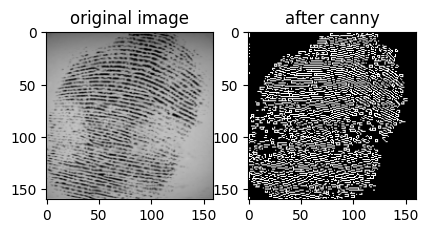

In [ ]:
x_canny_train, y_canny_train = Canny_Edge(df_train)
x_canny_test, y_canny_test = Canny_Edge(df_test)

In [ ]:
# convert the lists of x and y into numpy arrays
x_canny_train = np.array(x_canny_train)
y_canny_train = np.array(y_canny_train).reshape(len(y_canny_train), 1)

x_canny_test = np.array(x_canny_test)
y_canny_test = np.array(y_canny_test).reshape(len(y_canny_test), 1)

In [ ]:
# print their shapes
print('Train Feature shape: ', x_canny_train.shape)
print('Train Labels shape: ', y_canny_train.shape)

print('Test Feature shape: ', x_canny_test.shape)
print('Test Labels shape: ', y_canny_test.shape)

Train Feature shape:  (2771, 25600)
Train Labels shape:  (2771, 1)
Test Feature shape:  (693, 25600)
Test Labels shape:  (693, 1)


### 7.2 Harris key points
Harris Corner detection algorithm was developed to identify the internal corners of an image. Harris Corner Detection is a method to extract the corners from the input image and to extract features from the input image. [4]

In [ ]:
# the size of image
img_size = 160
# the channel of image
channel = cv2.IMREAD_COLOR # cv2.IMREAD_COLOR # cv2.IMREAD_UNCHANGED or cv2.IMREAD_GRAYSCALE

def Harris_key_points(data_frame):
  x = []
  y = []

  for index, row in data_frame.iterrows():
    img_path= row[0]
    img_label = row[1]

    # Step1: read image
    img_arr = cv2.imread(img_path, channel) 

    # Step2: resize image
    resized_arr = cv2.resize(img_arr, (img_size, img_size))

    img_arr_copy = resized_arr.copy()

    # Step3 : Harris Corner detection method (We used the common values for each hyperparameters)

    # convert the input image into grayscale color space
    image_gray = cv2.cvtColor(resized_arr, cv2.COLOR_BGR2GRAY)

    # setting to 32-bit floating point
    image_flt = np.float32(image_gray) 

    # apply it to the image
    corner = cv2.cornerHarris(image_flt, 2, 5, 0.07)

    # Reverting back to the original image, with optimal threshold value
    img_arr_copy[corner > 0.01 * corner.max()]=[0, 0, 255]


    # -------- printing one sample --------------
    if index == 4:
      fig = plt.figure(figsize=(10, 10))
      plt.subplot(4, 4, 1)
      plt.imshow(resized_arr, cmap='gray')
      plt.title("original image")

      plt.subplot(4, 4, 2)
      plt.imshow(img_arr_copy, cmap='gray')
      plt.title("after harris")
    # -------- printing one sample --------------

    # Step4: convert image into feature vector

    feature_vector = img_arr_copy.reshape(img_arr_copy.shape[0]*img_arr_copy.shape[1]*img_arr_copy.shape[2])


    # Step5: normalize the pixels value to lie between 0 to 1
    # in order to smplify the caluclations
    feature_vector = feature_vector.astype('float32') 
    feature_vector = feature_vector / 255.0 


    x.append(feature_vector)
    y.append(img_label)
  
  return x, y

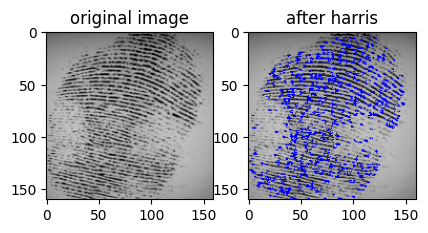

In [ ]:
x_harris_train, y_harris_train = Harris_key_points(df_train)
x_harris_test, y_harris_test = Harris_key_points(df_test)

In [ ]:
# convert the lists of x and y into numpy arrays
# so that to make it suitable as input for tensorflow methods (fit, evaluate, predict)
x_harris_train = np.array(x_harris_train)
y_harris_train = np.array(y_harris_train).reshape(len(y_harris_train), 1)

x_harris_test = np.array(x_harris_test)
y_harris_test = np.array(y_harris_test).reshape(len(y_harris_test), 1)

In [ ]:
# print their shapes
print('Train Feature shape: ', x_harris_train.shape)
print('Train Labels shape: ', y_harris_train.shape)

print('Test Feature shape: ', x_harris_test.shape)
print('Test Labels shape: ', y_harris_test.shape)

Train Feature shape:  (2771, 76800)
Train Labels shape:  (2771, 1)
Test Feature shape:  (693, 76800)
Test Labels shape:  (693, 1)


### 7.3 SIFT key points
SIFT (Scale Invariant Feature Transform) Detector is used in the detection of interest points on an input image. Unlike the Harris Detector, which is dependent on properties of the image such as viewpoint, depth, and scale, SIFT can perform feature detection independent of these properties of the image. This is achieved by the transformation of the image data into scale-invariant coordinates. The SIFT Detector has been said to be a close approximation of the system used in the primate visual system. [7]
-	Steps for extracting interest points:
-	Scale Space Peak Selection
-	Key Point Localization
-	Assigning Orientation to Keypoints
-	Key Point Descriptor


In [ ]:
# the size of image
img_size = 160
# the channel of image
channel = cv2.IMREAD_COLOR # cv2.IMREAD_COLOR # cv2.IMREAD_UNCHANGED or cv2.IMREAD_GRAYSCALE

def SIFT_key_points(data_frame):
  x = []
  y = []

  for index, row in data_frame.iterrows():
    img_path= row[0]
    img_label = row[1]

    # Step1: read image
    img_arr = cv2.imread(img_path, channel) 

    # Step2: resize image
    resized_arr = cv2.resize(img_arr, (img_size, img_size))
    img_arr_copy = resized_arr.copy()
    
    # Step3: Applying SIFT detector (We used the common values for each hyperparameters)
    
    # Converting image to grayscale
    gray= cv2.cvtColor(resized_arr,cv2.COLOR_BGR2GRAY)

    # create sift obj
    sift = cv2.xfeatures2d.SIFT_create()

    # apply it to the image
    kp = sift.detect(gray, None)
    
    # Step4: Marking the keypoint on the image using circles
    img_sift=cv2.drawKeypoints(gray ,
                          kp ,
                          img_arr_copy ,
                          flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


    # -------- printing one sample --------------
    if index == 4:
      fig = plt.figure(figsize=(10, 10))
      plt.subplot(4, 4, 1)
      plt.imshow(resized_arr, cmap='gray')
      plt.title("original image")

      plt.subplot(4, 4, 2)
      plt.imshow(img_sift, cmap='gray')
      plt.title("after canny")
    # -------- printing one sample --------------

    # Step5: convert image into feature vector
    feature_vector = img_sift.reshape(img_sift.shape[0]*img_sift.shape[1]*img_sift.shape[2])

    # Step6: normalize the pixels value to lie between 0 to 1
    # in order to smplify the caluclations
    feature_vector = feature_vector.astype('float32') 
    feature_vector = feature_vector / 255.0 

    x.append(feature_vector)
    y.append(img_label)
  
  return x, y

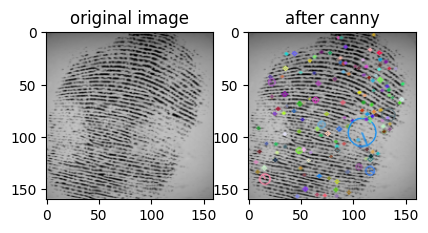

In [ ]:
x_sift_train, y_sift_train = SIFT_key_points(df_train)
x_sift_test, y_sift_test = SIFT_key_points(df_test)

In [ ]:
# convert the lists of x and y into numpy arrays
# so that to make it suitable as input for tensorflow methods (fit, evaluate, predict)
x_sift_train = np.array(x_sift_train)
y_sift_train = np.array(y_sift_train).reshape(len(y_sift_train), 1)

x_sift_test = np.array(x_sift_test)
y_sift_test = np.array(y_sift_test).reshape(len(y_sift_test), 1)

In [ ]:
# print their shapes
print('Train Feature shape: ', x_sift_train.shape)
print('Train Labels shape: ', y_sift_train.shape)

print('Test Feature shape: ', x_sift_test.shape)
print('Test Labels shape: ', y_sift_test.shape)

Train Feature shape:  (2771, 76800)
Train Labels shape:  (2771, 1)
Test Feature shape:  (693, 76800)
Test Labels shape:  (693, 1)


### 7.4 Feature fusion

In [ ]:
# combaine all features vector into one vector
x_all_train = np.concatenate((x_canny_train, x_harris_train, x_sift_train), axis=1)
y_all_train = y_canny_train.copy()

x_all_test = np.concatenate((x_canny_test, x_harris_test, x_sift_test), axis=1)
y_all_test = y_canny_test.copy()

In [ ]:
# print their shapes
print('Train Feature shape: ', x_all_train.shape)
print('Train Labels shape: ', y_all_train.shape)

print('Test Feature shape: ', x_all_test.shape)
print('Test Labels shape: ', y_all_test.shape)

Train Feature shape:  (2771, 179200)
Train Labels shape:  (2771, 1)
Test Feature shape:  (693, 179200)
Test Labels shape:  (693, 1)


## 8. Classification (mutli-class)

### 8.1 Support Vector Machine (SVM)

In [ ]:
SVM_model_canny = LinearSVC(random_state = 42)
SVM_model_canny.fit(x_canny_train, y_canny_train)

SVM_y_canny_train_pred = SVM_model_canny.predict(x_canny_train)
SVM_y_canny_test_pred = SVM_model_canny.predict(x_canny_test)

In [ ]:
print(classification_report(y_canny_test,SVM_y_canny_test_pred))

              precision    recall  f1-score   support

           1       0.11      0.01      0.02        75
           2       0.30      0.37      0.33       175
           3       0.42      0.43      0.43       233
           4       0.34      0.37      0.36       210

    accuracy                           0.35       693
   macro avg       0.29      0.30      0.28       693
weighted avg       0.33      0.35      0.34       693



In [ ]:
SVM_model_harris = LinearSVC(random_state = 42)
SVM_model_harris.fit(x_harris_train, y_harris_train)

SVM_y_harris_train_pred = SVM_model_harris.predict(x_harris_train)
SVM_y_harris_test_pred = SVM_model_harris.predict(x_harris_test)


In [ ]:
print(classification_report(y_harris_test,SVM_y_harris_test_pred))

              precision    recall  f1-score   support

           1       0.16      0.04      0.06        75
           2       0.30      0.37      0.33       175
           3       0.39      0.41      0.40       233
           4       0.35      0.36      0.35       210

    accuracy                           0.34       693
   macro avg       0.30      0.29      0.29       693
weighted avg       0.33      0.34      0.33       693



In [ ]:
SVM_model_sift = LinearSVC(random_state = 42)
SVM_model_sift.fit(x_sift_train, y_sift_train)

SVM_y_sift_train_pred = SVM_model_sift.predict(x_sift_train)
SVM_y_sift_test_pred = SVM_model_sift.predict(x_sift_test)

In [ ]:
print(classification_report(y_sift_test,SVM_y_sift_test_pred))

              precision    recall  f1-score   support

           1       0.04      0.01      0.02        75
           2       0.28      0.35      0.32       175
           3       0.38      0.37      0.38       233
           4       0.36      0.38      0.37       210

    accuracy                           0.33       693
   macro avg       0.27      0.28      0.27       693
weighted avg       0.31      0.33      0.32       693



In [ ]:
SVM_model_all = LinearSVC(random_state = 42)
SVM_model_all.fit(x_all_train, y_all_train)

SVM_y_all_train_pred = SVM_model_all.predict(x_all_train)
SVM_y_all_test_pred = SVM_model_all.predict(x_all_test)

In [ ]:
print(classification_report(y_all_test,SVM_y_all_test_pred))

              precision    recall  f1-score   support

           1       0.14      0.01      0.02        75
           2       0.32      0.42      0.36       175
           3       0.43      0.42      0.43       233
           4       0.39      0.43      0.41       210

    accuracy                           0.38       693
   macro avg       0.32      0.32      0.31       693
weighted avg       0.36      0.38      0.36       693



### 8.2 Random Forest (RF)

In [ ]:
RF_model_canny = RandomForestClassifier(n_jobs=-1, random_state = 42)
RF_model_canny.fit(x_canny_train, y_canny_train)

RF_y_canny_train_pred = RF_model_canny.predict(x_canny_train)
RF_y_canny_test_pred = RF_model_canny.predict(x_canny_test)

In [ ]:
print(classification_report(y_canny_test,RF_y_canny_test_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        75
           2       0.32      0.43      0.37       175
           3       0.37      0.37      0.37       233
           4       0.34      0.36      0.35       210

    accuracy                           0.34       693
   macro avg       0.26      0.29      0.27       693
weighted avg       0.31      0.34      0.32       693



In [ ]:
RF_model_harris = RandomForestClassifier(n_jobs=-1, random_state = 42)
RF_model_harris.fit(x_harris_train, y_harris_train)

RF_y_harris_train_pred = RF_model_harris.predict(x_harris_train)
RF_y_harris_test_pred = RF_model_harris.predict(x_harris_test)

In [ ]:
print(classification_report(y_harris_test,RF_y_harris_test_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        75
           2       0.33      0.47      0.39       175
           3       0.45      0.47      0.46       233
           4       0.43      0.42      0.42       210

    accuracy                           0.40       693
   macro avg       0.30      0.34      0.32       693
weighted avg       0.37      0.40      0.38       693



In [ ]:
RF_model_sift = RandomForestClassifier(n_jobs=-1, random_state = 42)
RF_model_sift.fit(x_sift_train, y_sift_train)

RF_y_sift_train_pred = RF_model_sift.predict(x_sift_train)
RF_y_sift_test_pred = RF_model_sift.predict(x_sift_test)

In [ ]:
print(classification_report(y_sift_test,RF_y_sift_test_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        75
           2       0.30      0.38      0.33       175
           3       0.40      0.41      0.41       233
           4       0.38      0.42      0.40       210

    accuracy                           0.36       693
   macro avg       0.27      0.30      0.29       693
weighted avg       0.33      0.36      0.34       693



In [ ]:
RF_model_all = RandomForestClassifier(n_jobs=-1, random_state = 42)
RF_model_all.fit(x_all_train, y_all_train)



In [ ]:
RF_y_all_train_pred = RF_model_all.predict(x_all_train)
RF_y_all_test_pred = RF_model_all.predict(x_all_test)

In [ ]:
print(classification_report(y_all_test,RF_y_all_test_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        75
           2       0.31      0.43      0.36       175
           3       0.41      0.40      0.41       233
           4       0.37      0.40      0.38       210

    accuracy                           0.36       693
   macro avg       0.27      0.31      0.29       693
weighted avg       0.33      0.36      0.34       693



### 8.3 Multi-layer perceptron (MLP)

In [ ]:
MLP_model_canny = MLPClassifier(hidden_layer_sizes=[512, 128, 64], random_state = 42)
MLP_model_canny.fit(x_canny_train, y_canny_train)

MLP_y_canny_train_pred = MLP_model_canny.predict(x_canny_train)
MLP_y_canny_test_pred = MLP_model_canny.predict(x_canny_test)

In [ ]:
print(classification_report(y_canny_test,MLP_y_canny_test_pred))

              precision    recall  f1-score   support

           1       0.22      0.03      0.05        75
           2       0.30      0.37      0.33       175
           3       0.41      0.38      0.39       233
           4       0.36      0.44      0.39       210

    accuracy                           0.35       693
   macro avg       0.32      0.30      0.29       693
weighted avg       0.35      0.35      0.34       693



In [ ]:
MLP_model_harris = MLPClassifier(hidden_layer_sizes=[512, 128, 64], random_state = 42)
MLP_model_harris.fit(x_harris_train, y_harris_train)

MLP_y_harris_train_pred = MLP_model_harris.predict(x_harris_train)
MLP_y_harris_test_pred = MLP_model_harris.predict(x_harris_test)

In [ ]:
print(classification_report(y_harris_test,MLP_y_harris_test_pred))

              precision    recall  f1-score   support

           1       0.33      0.01      0.03        75
           2       0.39      0.05      0.09       175
           3       0.35      0.96      0.51       233
           4       0.53      0.08      0.13       210

    accuracy                           0.36       693
   macro avg       0.40      0.27      0.19       693
weighted avg       0.41      0.36      0.24       693



In [ ]:
MLP_model_sift = MLPClassifier(hidden_layer_sizes=[512, 128, 64], random_state = 42)
MLP_model_sift.fit(x_sift_train, y_sift_train)

MLP_y_sift_train_pred = MLP_model_sift.predict(x_sift_train)
MLP_y_sift_test_pred = MLP_model_sift.predict(x_sift_test)

In [ ]:
print(classification_report(y_sift_test,MLP_y_sift_test_pred))

              precision    recall  f1-score   support

           1       0.14      0.20      0.16        75
           2       0.22      0.02      0.04       175
           3       0.35      0.85      0.50       233
           4       0.00      0.00      0.00       210

    accuracy                           0.31       693
   macro avg       0.18      0.27      0.17       693
weighted avg       0.19      0.31      0.19       693



In [ ]:
MLP_model_all = MLPClassifier(hidden_layer_sizes=[512, 128, 64], random_state = 42)
MLP_model_all.fit(x_all_train, y_all_train)

MLP_y_all_train_pred = MLP_model_all.predict(x_all_train)
MLP_y_all_test_pred = MLP_model_all.predict(x_all_test)

In [ ]:
print(classification_report(y_all_test,MLP_y_all_test_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        75
           2       0.00      0.00      0.00       175
           3       0.34      1.00      0.50       233
           4       0.00      0.00      0.00       210

    accuracy                           0.34       693
   macro avg       0.08      0.25      0.13       693
weighted avg       0.11      0.34      0.17       693



## 9. Evaluation (the accuracy, precision, and F1)

In [ ]:
# SVM
SVM_canny_accuracy_train = accuracy_score(y_canny_train, SVM_y_canny_train_pred)
SVM_canny_accuracy_test = accuracy_score(y_canny_test,SVM_y_canny_test_pred)

SVM_canny_precision_train = precision_score(y_canny_train, SVM_y_canny_train_pred, average='weighted')
SVM_canny_precision_test = precision_score(y_canny_test,SVM_y_canny_test_pred, average='weighted')


SVM_canny_f1_train = f1_score(y_canny_train, SVM_y_canny_train_pred, average='weighted')
SVM_canny_f1_test = f1_score(y_canny_test,SVM_y_canny_test_pred, average='weighted')


# ----------------

SVM_harris_accuracy_train = accuracy_score(y_harris_train, SVM_y_harris_train_pred)
SVM_harris_accuracy_test = accuracy_score(y_harris_test,SVM_y_harris_test_pred)

SVM_harris_precision_train = precision_score(y_harris_train, SVM_y_harris_train_pred, average='weighted')
SVM_harris_precision_test = precision_score(y_harris_test,SVM_y_harris_test_pred, average='weighted')

SVM_harris_f1_train = f1_score(y_harris_train, SVM_y_harris_train_pred, average='weighted')
SVM_harris_f1_test = f1_score(y_harris_test,SVM_y_harris_test_pred, average='weighted')


# ----------------

SVM_sift_accuracy_train = accuracy_score(y_sift_train, SVM_y_sift_train_pred)
SVM_sift_accuracy_test = accuracy_score(y_sift_test,SVM_y_sift_test_pred)

SVM_sift_precision_train = precision_score(y_sift_train, SVM_y_sift_train_pred, average='weighted')
SVM_sift_precision_test = precision_score(y_sift_test,SVM_y_sift_test_pred, average='weighted')

SVM_sift_f1_train = f1_score(y_sift_train, SVM_y_sift_train_pred, average='weighted')
SVM_sift_f1_test = f1_score(y_sift_test,SVM_y_sift_test_pred, average='weighted')


# ----------------

SVM_all_accuracy_train = accuracy_score(y_all_train, SVM_y_all_train_pred)
SVM_all_accuracy_test = accuracy_score(y_all_test,SVM_y_all_test_pred)

SVM_all_precision_train = precision_score(y_all_train, SVM_y_all_train_pred, average='weighted')
SVM_all_precision_test = precision_score(y_all_test,SVM_y_all_test_pred, average='weighted')

SVM_all_f1_train = f1_score(y_all_train, SVM_y_all_train_pred, average='weighted')
SVM_all_f1_test = f1_score(y_all_test,SVM_y_all_test_pred, average='weighted')

In [ ]:
# RF

RF_canny_accuracy_train = accuracy_score(y_canny_train, RF_y_canny_train_pred)
RF_canny_accuracy_test = accuracy_score(y_canny_test,RF_y_canny_test_pred)

RF_canny_precision_train = precision_score(y_canny_train, RF_y_canny_train_pred, average='weighted')
RF_canny_precision_test = precision_score(y_canny_test,RF_y_canny_test_pred, average='weighted')

RF_canny_f1_train = f1_score(y_canny_train, RF_y_canny_train_pred, average='weighted')
RF_canny_f1_test = f1_score(y_canny_test,RF_y_canny_test_pred, average='weighted')

# ----------------

RF_harris_accuracy_train = accuracy_score(y_harris_train, RF_y_harris_train_pred)
RF_harris_accuracy_test = accuracy_score(y_harris_test,RF_y_harris_test_pred)

RF_harris_precision_train = precision_score(y_harris_train, RF_y_harris_train_pred, average='weighted')
RF_harris_precision_test = precision_score(y_harris_test,RF_y_harris_test_pred, average='weighted')

RF_harris_f1_train = f1_score(y_harris_train, RF_y_harris_train_pred, average='weighted')
RF_harris_f1_test = f1_score(y_harris_test,RF_y_harris_test_pred, average='weighted')

# ----------------

RF_sift_accuracy_train = accuracy_score(y_sift_train, RF_y_sift_train_pred)
RF_sift_accuracy_test = accuracy_score(y_sift_test,RF_y_sift_test_pred)

RF_sift_precision_train = precision_score(y_sift_train, RF_y_sift_train_pred, average='weighted')
RF_sift_precision_test = precision_score(y_sift_test,RF_y_sift_test_pred, average='weighted')

RF_sift_f1_train = f1_score(y_sift_train, RF_y_sift_train_pred, average='weighted')
RF_sift_f1_test = f1_score(y_sift_test,RF_y_sift_test_pred, average='weighted')

# ----------------

RF_all_accuracy_train = accuracy_score(y_all_train, RF_y_all_train_pred)
RF_all_accuracy_test = accuracy_score(y_all_test,RF_y_all_test_pred)

RF_all_precision_train = precision_score(y_all_train, RF_y_all_train_pred, average='weighted')
RF_all_precision_test = precision_score(y_all_test,RF_y_all_test_pred, average='weighted')

RF_all_f1_train = f1_score(y_all_train, RF_y_all_train_pred, average='weighted')
RF_all_f1_test = f1_score(y_all_test,RF_y_all_test_pred, average='weighted')

In [ ]:
# MLP

MLP_canny_accuracy_train = accuracy_score(y_canny_train, MLP_y_canny_train_pred)
MLP_canny_accuracy_test = accuracy_score(y_canny_test,MLP_y_canny_test_pred)

MLP_canny_precision_train = precision_score(y_canny_train, MLP_y_canny_train_pred, average='weighted')
MLP_canny_precision_test = precision_score(y_canny_test,MLP_y_canny_test_pred, average='weighted')

MLP_canny_f1_train = f1_score(y_canny_train, MLP_y_canny_train_pred, average='weighted')
MLP_canny_f1_test = f1_score(y_canny_test,MLP_y_canny_test_pred, average='weighted')

# ----------------

MLP_harris_accuracy_train = accuracy_score(y_harris_train, MLP_y_harris_train_pred)
MLP_harris_accuracy_test = accuracy_score(y_harris_test,MLP_y_harris_test_pred)

MLP_harris_precision_train = precision_score(y_harris_train, MLP_y_harris_train_pred, average='weighted')
MLP_harris_precision_test = precision_score(y_harris_test,MLP_y_harris_test_pred, average='weighted')

MLP_harris_f1_train = f1_score(y_harris_train, MLP_y_harris_train_pred, average='weighted')
MLP_harris_f1_test = f1_score(y_harris_test,MLP_y_harris_test_pred, average='weighted')

# ----------------

MLP_sift_accuracy_train = accuracy_score(y_sift_train, MLP_y_sift_train_pred)
MLP_sift_accuracy_test = accuracy_score(y_sift_test,MLP_y_sift_test_pred)

MLP_sift_precision_train = precision_score(y_sift_train, MLP_y_sift_train_pred, average='weighted')
MLP_sift_precision_test = precision_score(y_sift_test,MLP_y_sift_test_pred, average='weighted')

MLP_sift_f1_train = f1_score(y_sift_train, MLP_y_sift_train_pred, average='weighted')
MLP_sift_f1_test = f1_score(y_sift_test,MLP_y_sift_test_pred, average='weighted')

# ----------------

MLP_all_accuracy_train = accuracy_score(y_all_train, MLP_y_all_train_pred)
MLP_all_accuracy_test = accuracy_score(y_all_test,MLP_y_all_test_pred)

MLP_all_precision_train = precision_score(y_all_train, MLP_y_all_train_pred, average='weighted')
MLP_all_precision_test = precision_score(y_all_test,MLP_y_all_test_pred, average='weighted')

MLP_all_f1_train = f1_score(y_all_train, MLP_y_all_train_pred, average='weighted')
MLP_all_f1_test = f1_score(y_all_test,MLP_y_all_test_pred, average='weighted')


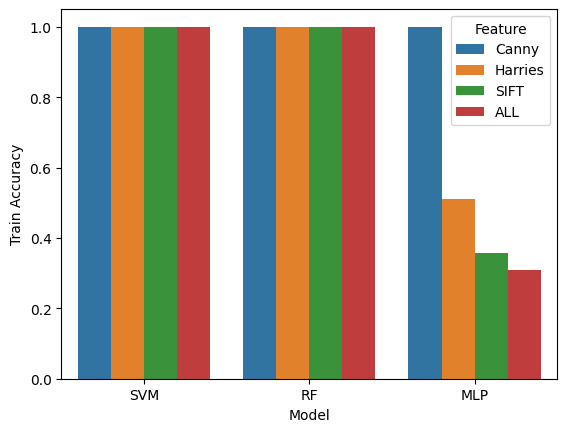

In [ ]:
accuracy_results = [SVM_canny_accuracy_train, SVM_harris_accuracy_train, SVM_sift_accuracy_train, SVM_all_accuracy_train,
 RF_canny_accuracy_train, RF_harris_accuracy_train, RF_sift_accuracy_train, RF_all_accuracy_train,
 MLP_canny_accuracy_train, MLP_harris_accuracy_train, MLP_sift_accuracy_train, MLP_all_accuracy_train]

df = pd.DataFrame({'Model': np.repeat(['SVM', 'RF', 'MLP'], 4),
                   'Feature': np.tile(['Canny', 'Harries', 'SIFT', 'ALL'], 3),
                   'Train Accuracy': np.array(accuracy_results)})
sns.barplot(data=df, x='Model', y='Train Accuracy', hue='Feature')
plt.show()


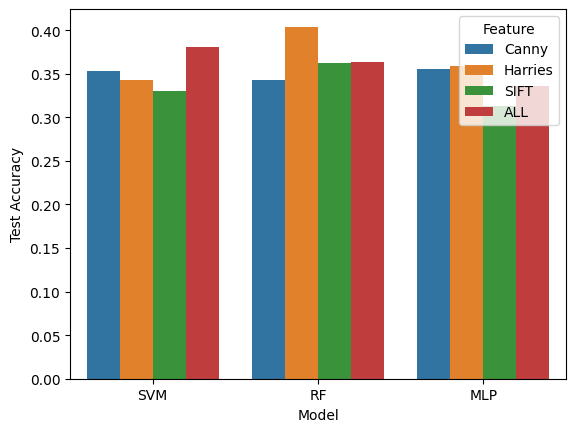

In [ ]:
accuracy_results = [SVM_canny_accuracy_test, SVM_harris_accuracy_test, SVM_sift_accuracy_test, SVM_all_accuracy_test,
 RF_canny_accuracy_test, RF_harris_accuracy_test, RF_sift_accuracy_test, RF_all_accuracy_test,
 MLP_canny_accuracy_test, MLP_harris_accuracy_test, MLP_sift_accuracy_test, MLP_all_accuracy_test]

df = pd.DataFrame({'Model': np.repeat(['SVM', 'RF', 'MLP'], 4),
                   'Feature': np.tile(['Canny', 'Harries', 'SIFT', 'ALL'], 3),
                   'Test Accuracy': np.array(accuracy_results)})
sns.barplot(data=df, x='Model', y='Test Accuracy', hue='Feature')
plt.show()

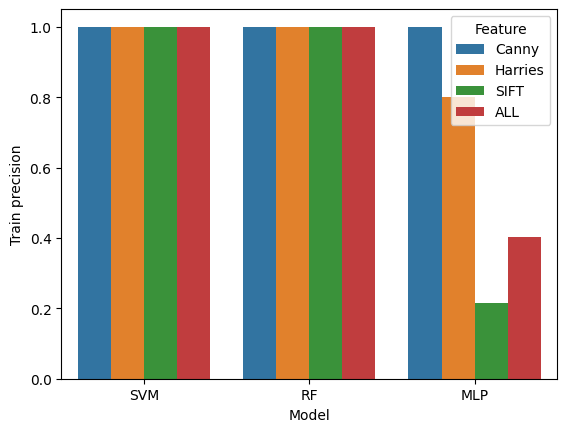

In [ ]:
precision_results = [SVM_canny_precision_train, SVM_harris_precision_train, SVM_sift_precision_train, SVM_all_precision_train,
 RF_canny_precision_train, RF_harris_precision_train, RF_sift_precision_train, RF_all_precision_train,
 MLP_canny_precision_train, MLP_harris_precision_train, MLP_sift_precision_train, MLP_all_precision_train]

df = pd.DataFrame({'Model': np.repeat(['SVM', 'RF', 'MLP'], 4),
                   'Feature': np.tile(['Canny', 'Harries', 'SIFT', 'ALL'], 3),
                   'Train precision': np.array(precision_results)})
sns.barplot(data=df, x='Model', y='Train precision', hue='Feature')
plt.show()


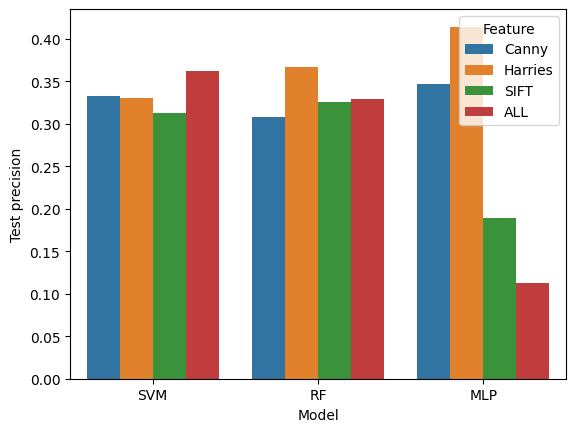

In [ ]:
precision_results = [SVM_canny_precision_test, SVM_harris_precision_test, SVM_sift_precision_test, SVM_all_precision_test,
 RF_canny_precision_test, RF_harris_precision_test, RF_sift_precision_test, RF_all_precision_test,
 MLP_canny_precision_test, MLP_harris_precision_test, MLP_sift_precision_test, MLP_all_precision_test]

df = pd.DataFrame({'Model': np.repeat(['SVM', 'RF', 'MLP'], 4),
                   'Feature': np.tile(['Canny', 'Harries', 'SIFT', 'ALL'], 3),
                   'Test precision': np.array(precision_results)})
sns.barplot(data=df, x='Model', y='Test precision', hue='Feature')
plt.show()


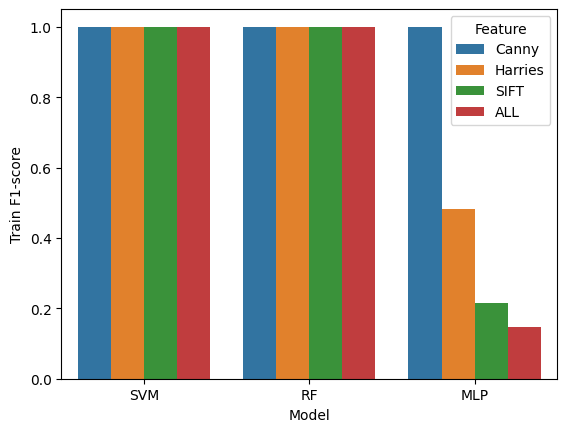

In [ ]:
f1_results = [SVM_canny_f1_train, SVM_harris_f1_train, SVM_sift_f1_train, SVM_all_f1_train,
 RF_canny_f1_train, RF_harris_f1_train, RF_sift_f1_train, RF_all_f1_train,
 MLP_canny_f1_train, MLP_harris_f1_train, MLP_sift_f1_train, MLP_all_f1_train]

df = pd.DataFrame({'Model': np.repeat(['SVM', 'RF', 'MLP'], 4),
                   'Feature': np.tile(['Canny', 'Harries', 'SIFT', 'ALL'], 3),
                   'Train F1-score': np.array(f1_results)})
sns.barplot(data=df, x='Model', y='Train F1-score', hue='Feature')
plt.show()

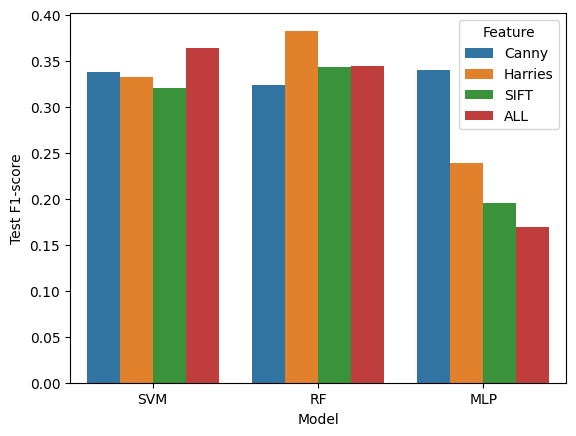

In [ ]:
f1_results = [SVM_canny_f1_test, SVM_harris_f1_test, SVM_sift_f1_test, SVM_all_f1_test,
 RF_canny_f1_test, RF_harris_f1_test, RF_sift_f1_test, RF_all_f1_test,
 MLP_canny_f1_test, MLP_harris_f1_test, MLP_sift_f1_test, MLP_all_f1_test]

df = pd.DataFrame({'Model': np.repeat(['SVM', 'RF', 'MLP'], 4),
                   'Feature': np.tile(['Canny', 'Harries', 'SIFT', 'ALL'], 3),
                   'Test F1-score': np.array(f1_results)})
sns.barplot(data=df, x='Model', y='Test F1-score', hue='Feature')
plt.show()

## 10. Discussion and Analyze the results

**1. Improve the results.**

After we implement the three feature extractors with three classifiers, depending on the recommendation of classifiers with the FVC dataset, we choose SVM, RF and MLP. We notice that the performance is too low. Therefore, we review some previous studies [10, 11, 12] and we conclude that the dataset needs some pre-processing steps since it has noise, so we conduct the following pre-processing and enhancements:

- Adaptive Histogram Equalization (AHE).
- De-noising Low pass filter (Gaussian). 

Although, after we visualized the results, we found that it not helpful in feature extraction. Since the AHE affects some background area to make it as foreground and the Gaussian filter removes most lines in the fingerprint. 
In addition, we try to play around with following things in order to improve the performance:

- Resize image with different size.
- Normalize the image pixel.
- Reduce the number of features using Principal Component Analysis (PCA).

Regarding image size, we found that the 160 and 224 get the best result. Normalization is used in order to simplify computation, and it is the best practice in image-based applications. Feature reduction has a great impact to reduce the overfitting (reduce train performance from 100% to something between 92-95%). In the other hand, it reduce the performance in testing set. 

**2.	Which feature type is the best with which classifier?**

As we see in the visualization above, the training performance (either in accuracy, precision and f1-score) is 100% in SVM and RF for all feature types. But in MLP, the result is 100% on Canny (either in accuracy, precision and f1-score) and it is started to decrease on the remaining features. 
Regarding the testing performance, all the evaluation metrics on all features type was not so good, it is ranged between 15% to 40%. Although we tried to do some enhancement, the results did not grwoed more. This is due the simplisty of frature extractor types we have been used. Compared to CNN feature extractor, it has a huge number of feature extractor in each convlutional layer, with a cascade of convolutional layer, it showed that its appility to extract features from image dataset very well. In addition, the limitation of ML to process the image dataset. The Deep Learning feature extractor (learned features) give a good results compared to the hand-crafted feature extractors. 
We can conclude that :

- The Harris feature extractor get the best results in testing accuracy, precesion and f1 score on **RF** model. 
- The all combination feature extractors get the best results in testing accuracy, precesion and f1 score on **SVM** model. 
- The Harris feature extractor get the best results in testing accuracy, precesion on **MLP** model but Canny get the best in f1-score for **MLP** model. 


**3.	With the best feature type, which classifier is the best?**

RF is the best classifier among the SVM and MLP.


## 11. Conclusion
In this project, we use FVC dataset to demonstrate the ability to extract features using Canny, Harris and SIFT extractors along with different ML classifiers. We found that the best feature extractor is Harris extractor along with RF with 40% in testing accuracy, and 38% in testing f1-score. And the Harris extractor is the best along with MLP in term of precison,  with 40% in testing precesion. Although, the results was not raise above 40%. At the end, we conclude that the Deep Learning feature extractor (learned features) give a good results compared to the hand-crafted feature extractors.  

## 12. References

- [1]	“FVC2004 - Third International Fingerprint Verification Competition.” Bias.csr.unibo.it, bias.csr.unibo.it/fvc2004/download.asp.
- [2]	“Python OpenCV - Canny() Function.” GeeksforGeeks, 20 Nov. 2021, www.geeksforgeeks.org/python-opencv-canny-function/.
- [3]	“What Is the Canny Edge Detection Technique in OpenCV -.” ProjectPro, www.projectpro.io/recipes/what-is-canny-edge-detection-technique-opencv. Accessed 4 June 2023.
- [4]	“Python | Corner Detection with Harris Corner Detection Method Using OpenCV.” GeeksforGeeks, 21 Jan. 2019, www.geeksforgeeks.org/python-corner-detection-with-harris-corner-detection-method-using-opencv/. Accessed 4 June 2023.
- [5]	“How to Detect Corners Using the Harris Corner Method in OpenCV -.” ProjectPro, www.projectpro.io/recipes/detect-corners-harris-corner-method-opencv. Accessed 4 June 2023.
- [6]	“OpenCV: Harris Corner Detection.” Docs.opencv.org, docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html#:~:text=So%2. Accessed 4 June 2023.
- [7]	“SIFT Interest Point Detector Using Python - OpenCV.” GeeksforGeeks, 9 Dec. 2020, www.geeksforgeeks.org/sift-interest-point-detector-using-python-opencv/.
- [8]	“What Is Scale Invariant Feature Transformation SIFT in OpenCV -.” ProjectPro, www.projectpro.io/recipes/what-is-scale-invariant-feature-transformation-sift-opencv. Accessed 4 June 2023.
- [9]	“Python OpenCV - DrawKeypoints() Function.” GeeksforGeeks, 17 Feb. 2022, www.geeksforgeeks.org/python-opencv-drawkeypoints-fuction/. Accessed 4 June 2023.
- [10]	Nguyen, Huong Thu, and Long The Nguyen. “Fingerprints Classification through Image Analysis and Machine Learning Method.” Algorithms, vol. 12, no. 11, 11 Nov. 2019, p. 241, https://doi.org/10.3390/a12110241. Accessed 16 Dec. 2019.
- [11]	Chanklan, Ratiporn, et al. “Fingerprint Recognition with Edge Detection and Dimensionality Reduction Techniques.” The Proceedings of the 2nd International Conference on Industrial Application Engineering 2015, 2015, pdfs.semanticscholar.org/5ff9/4db197469c08ebb63d14e25982a86a83fd90.pdf, https://doi.org/10.12792/iciae2015.098. Accessed 28 Sept. 2021.
- [12]	Dincă Lăzărescu, Andreea-Monica, et al. “A Fingerprint Matching Algorithm Using the Combination of Edge Features and Convolution Neural Networks.” Inventions, vol. 7, no. 2, 27 May 2022, p. 39, https://doi.org/10.3390/inventions7020039.
- [13]	Brownlee, Jason. “4 Types of Classification Tasks in Machine Learning.” Machine Learning Mastery, 7 Apr. 2020, machinelearningmastery.com/types-of-classification-in-machine-learning/.
[14]	“1.12. Multiclass and Multilabel Algorithms — Scikit-Learn 0.21.3 Documentation.” Scikit-Learn.org, 2009, scikit-learn.org/stable/modules/multiclass.html.

